# Babatunde John Olanipekun.  

## About the dataset.  
- Attibutes are chemical properties of elements of the periodic table.
- We have the critical temperature as the response variable.    
    - So this will be a **regression task.**    

## Objective.  
Explore the difference between L1 (lasso penalty) and L2 (ridge penalty).  
- Lasso: leads to sparsity because unimportant attributes are reduced to 0.  
    - Therefore can be used for feature selection.  
- Ridge: Leads shrinks the weights of unimportant attributes.  


In [1]:
import pandas as pd
import os

In [2]:
#Confirm the working directory
os.getcwd()

'C:\\Users\\olani\\OneDrive\\Documents\\Data Science\\SMU-Data Science\\Quantifying the world'

In [3]:
path = r'.\superconduct'

In [4]:
df = pd.read_csv(os.path.join(path, 'train.csv'))
df2 = pd.read_csv(os.path.join(path,'unique_m.csv'))


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

## Datatypes are within expectations and they are all numeric. 
- Either ordinal or continuous data type.  

In [6]:
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [7]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Columns: 82 entries, number_of_elements to critical_temp
dtypes: float64(79), int64(3)
memory usage: 13.3 MB


**21263 row and 82 columns**

In [8]:
df2.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


In [9]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
regr = linear_model.LinearRegression()

## check for duplicated rows.

In [11]:
duplicate = df[df.duplicated()]
duplicate

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
8503,4,76.444563,51.381751,59.356672,35.040763,1.199541,1.291294,121.327600,14.343486,43.823354,...,2.07722,2.213364,2.063611,1.368922,1.203843,1,0.841699,0.433013,0.266940,93.00
12598,2,39.513500,45.227500,37.824826,43.895938,0.650720,0.431701,22.856000,31.184750,11.428000,...,4.75000,4.472136,4.728708,0.686962,0.514653,1,2.750000,0.500000,0.433013,17.00
12736,2,105.962750,121.538200,71.855677,86.707541,0.391159,0.308132,155.754500,99.069800,77.877250,...,5.20000,4.898979,5.101698,0.673012,0.617242,2,2.000000,1.000000,0.979796,2.84
12798,2,141.926690,149.730928,136.457070,144.380165,0.654860,0.588079,78.042380,67.406528,39.021190,...,5.40000,5.477226,5.378269,0.689009,0.686962,1,0.600000,0.500000,0.489898,2.35
12829,2,141.568190,141.568190,132.942020,132.942020,0.632849,0.632849,97.323620,48.661810,48.661810,...,5.50000,5.477226,5.477226,0.689009,0.689009,1,0.500000,0.500000,0.500000,2.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16715,2,60.332250,55.636875,59.596931,55.099520,0.680984,0.621712,18.781500,20.775375,9.390750,...,4.50000,3.872983,4.400559,0.661563,0.450561,2,3.000000,1.000000,0.866025,14.50
16734,2,141.568190,131.835828,132.942020,123.748210,0.632849,0.681188,97.323620,20.348172,48.661810,...,5.40000,5.477226,5.378269,0.689009,0.686962,1,0.600000,0.500000,0.489898,1.78
20068,2,114.090000,119.228900,113.831890,119.084493,0.690886,0.417951,15.340000,84.110300,7.670000,...,4.83500,4.472136,4.819254,0.686962,0.398567,1,3.515000,0.500000,0.371181,4.90
20069,2,118.289000,120.024500,118.238064,119.986110,0.692717,0.550104,6.942000,62.615500,3.471000,...,4.50000,3.872983,4.400559,0.661563,0.450561,2,3.000000,1.000000,0.866025,4.10


66 rows are duplicates and will be dropped as they won't contribute anything to the learning.   

In [12]:
import copy
df_ = copy.deepcopy(df) # sanity check
df_.drop_duplicates(inplace=True)
df_.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21197 entries, 0 to 21262
Columns: 82 entries, number_of_elements to critical_temp
dtypes: float64(79), int64(3)
memory usage: 13.4 MB


## Missing values:

Check for missing values. 

In [13]:
df.isnull().sum()[20:45]

wtd_std_fie                   0
mean_atomic_radius            0
wtd_mean_atomic_radius        0
gmean_atomic_radius           0
wtd_gmean_atomic_radius       0
entropy_atomic_radius         0
wtd_entropy_atomic_radius     0
range_atomic_radius           0
wtd_range_atomic_radius       0
std_atomic_radius             0
wtd_std_atomic_radius         0
mean_Density                  0
wtd_mean_Density              0
gmean_Density                 0
wtd_gmean_Density             0
entropy_Density               0
wtd_entropy_Density           0
range_Density                 0
wtd_range_Density             0
std_Density                   0
wtd_std_Density               0
mean_ElectronAffinity         0
wtd_mean_ElectronAffinity     0
gmean_ElectronAffinity        0
wtd_gmean_ElectronAffinity    0
dtype: int64

In [14]:
#Remove the target response from the predictor attributes. 
#Ensure the shape is the same as that of the main dataset.  
y = df_.critical_temp
y.shape

(21197,)

In [15]:
#Drop the encoded variables. 
df_.drop(columns=['critical_temp'], inplace=True)

In [16]:
from sklearn.model_selection import train_test_split
train, test, y_train, y_test = train_test_split(df_, y, test_size=0.15,random_state=42)


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline


In [18]:
scaler = StandardScaler()
X_train =  scaler.fit_transform(train)
X_test = scaler.transform(test)

## The feature names
- Feature names are lost after applying the standard scaler.  
- For better explainability, we retrieve them back.

In [19]:
train_scaled_features = pd.DataFrame(X_train, index=train.index, columns=train.columns)
test_scaled_features = pd.DataFrame(X_test, index=test.index, columns=test.columns)

## Fitting approach:  
- Define some estimators.  
- Cross validate with k = 10 folds to obtain the rmse scores for each.  
- Fit the train on the model that produces the lowest rmse score. 
    -  minimizing rmse is equivalent to maximizing negative-rmse as shown in the corss_val_score () method.


In [20]:
lin_reg = linear_model.LinearRegression()
ridge = linear_model.Ridge(alpha=1.0, random_state=123)
ridge_low = linear_model.Ridge(alpha=0.5, random_state=123)
ridge_lowest = linear_model.Ridge(alpha=0.1, random_state=123)
lasso = linear_model.Lasso(alpha=1.0, random_state=123)
lasso_low = linear_model.Lasso(alpha=0.5, random_state=123)
lasso_lowest = linear_model.Lasso(alpha=0.01, random_state=123)
clf_list = [lin_reg,ridge,ridge_low, ridge_lowest,lasso, lasso_low, lasso_lowest]

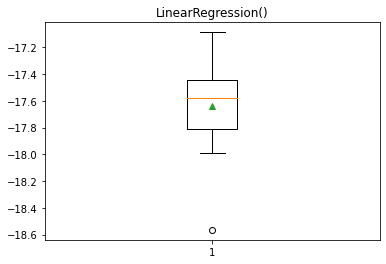

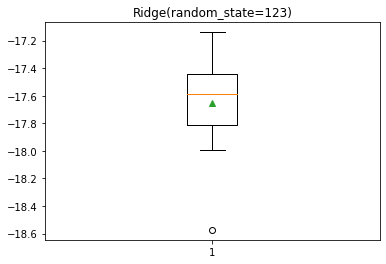

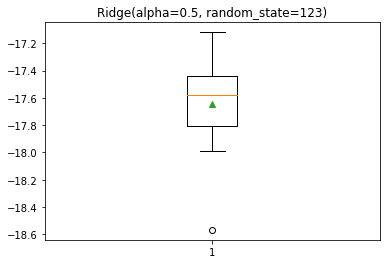

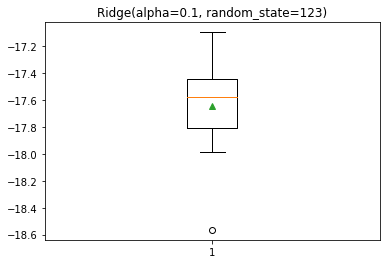

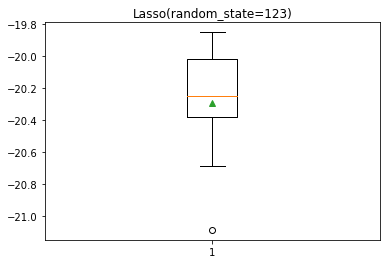

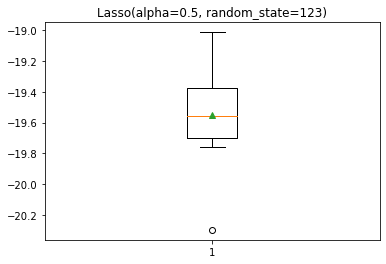

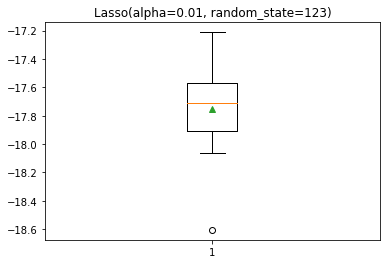

In [21]:
list_scores = []
for clf in clf_list:
    scores = cross_val_score(clf, train_scaled_features, y_train,scoring='neg_root_mean_squared_error', cv=10, n_jobs=-1)
    list_scores.append(scores)    
    plt.boxplot(scores, showmeans=True)
    plt.title(clf)
    plt.show()    

## Verdict:  
- Looking at the boxplot we can say that the lowest the stronger the regularization the better the model.
    - i.e. the rmse is lower. 
- Lasso showed this observation better.  
- There is no significant difference in the result of the strongly regularized ridge or lasso models so we go with lasso.  

In [22]:

clf_reg = lasso_lowest.fit(train_scaled_features, y_train)
clf_pred = clf_reg.predict(test_scaled_features)

C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1435261.061702971, tolerance: 2122.319516997967
  positive)


In [23]:
## see the response variable distribution.  
y.describe()

count    21197.000000
mean        34.494532
std         34.276465
min          0.000210
25%          5.380000
50%         20.000000
75%         63.000000
max        185.000000
Name: critical_temp, dtype: float64

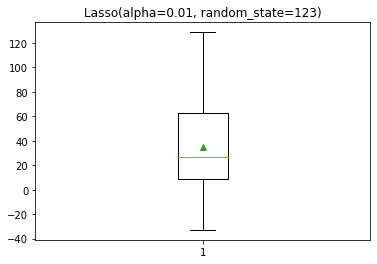

In [24]:
#We plot the predicted critical temperatures.  
plt.boxplot(clf_pred, showmeans=True)
plt.title(lasso_lowest)
plt.show()   

## Evaluate on root mean squared error

In [25]:
from sklearn.metrics import mean_squared_error
reg_rmse = np.sqrt(mean_squared_error(y_test, clf_pred))
reg_rmse


17.8143519092022

## Comments.  
- Predicting the critical temperature yielded an rmse of 17.8 degrees. 
- This is not a great score since the range of actual values is between 0.000 and 185 with a mean of 34.4.  
- That means we will be off the real value by almost 18 degrees which is a lot. 
- This means that our models were under-fitting the dataset.  